<h2>Содержание<span class="tocSkip"></span></h2>
<p> </p>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Загрузка-данных-и-предобработка-данных" data-toc-modified-id="1-Загрузка-данных-и-предобработка-данных"><span class="toc-item-num"></span>1 Загрузка данных и предобработка данных</a></span></li><li><span><a href="#2-Предобработка-данных" data-toc-modified-id="2-Предобработка-данных"><span class="toc-item-num"></span>2 Предобработка данных</a></span></li><li><span><a href="#3-Модель-для-прогнозирования-оттока-клиентов" data-toc-modified-id="3-Модель-для-прогнозирования-оттока-клиентов"><span class="toc-item-num"></span>3 Модель для прогнозирования оттока клиентов</a></span></li><li><span><a href="#4-Кластеризация-клиентов" data-toc-modified-id="4-Кластеризация-клиентов"><span class="toc-item-num"></span>4 Кластеризация клиентов</a></span></li><li><span><a href="#5-Общий-вывод" data-toc-modified-id="5-Общий-вывод"><span class="toc-item-num"></span>5 Общий вывод

# Описание проекта

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Необходимо проанализировать данные и подготовить план действий по удержанию клиентов.

А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;\
2) предложить меры по снижению оттока;\
3) определить другие особенности взаимодействия с клиентами.

## 1 Загрузка данных и предобработка данных

### 1.1 Импорт библиотек

In [1]:
#Импорт библиотек необходимых для работы
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.figure_factory as ff

### 1.2 Чтение данных

In [2]:
gym = pd.read_csv('gym_churn.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Group_visits` — факт посещения групповых занятий;
- `Age` — возраст;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Churn` — факт оттока в текущем месяце.

In [3]:
#посмотрим общую информацию о датасете
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym.shape

(4000, 14)

В датасете 14 столбцов, 13 приходится на признаки, и 1 столбец с целевой переменной.\
В датасете 4000 строк.\
Отсутствующих данных нет.\
Для удобства работы переведем названия столбцов к нижнему регистру, изменим тип данных в столбце `month_to_end_contract` и проверим датасет на дубликаты.

## 2 Предобработка данных

In [5]:
#переведем названия колонок в нижний регистр
gym.columns = gym.columns.str.lower()

In [6]:
#переведем тип данных в int
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int64')

In [7]:
#проверим датасет на дубликаты
gym.duplicated().sum()

0

In [8]:
#посмотрим общую информацию о датасете
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Соотношение клиентов по полу примерно одинаковое.\
Больше половины клиентов проживают рядом с фитнес-центром\
Почти половина клиентов являются сотрудниками компании-партнера\
Меньше половины клиентов пришли по акции "приведи друга"\
Практически все клиенты преоставили номер телефона\
Больше половины клиентов имеют месячный абонемент, и лишь четверть абонемент на 6 месяцев\
40 % клиентов посещают групповые занятия\
Средний возраст клиентов - 29 лет\
В среднем клиент оставляет около 137 у.е. на дополнительные услуги центра\
Половина клиентов обратилась в центра 3 месяца назад\
Половина клиентов ходит в фитнес-центр 1,8 раза в неделю. Месяцем ранее эта величина была чуть ниже 1,7 раз в неделю.\
Около четверти клиентов попала в отток.

In [9]:
#посмотрим на средние значения признаков в двух группах 'Churn'
gym.groupby('churn').mean().round(2).T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Клиенты, оставшиеся с фитнес-центром, в отличие от ушедших клиентов:
- проживают или работают рядом с  фитнес-центром
- являются сотрудником компании-партнера
- имеют абонемент на большее количество месяцев
- попали в фитнес-центр по акции "пригласи друга" в большей степени
- больше посещают групповые занятия
- оставляют больше денег на дополнительные услуга фитнес - центра
- ходят в фитнес-центр в неделю чащеи

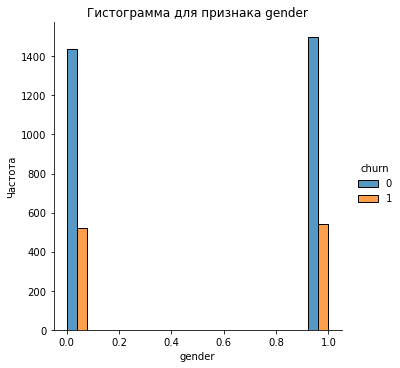

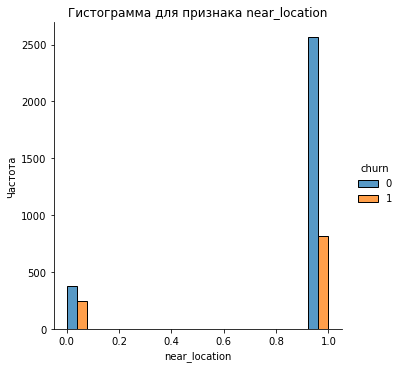

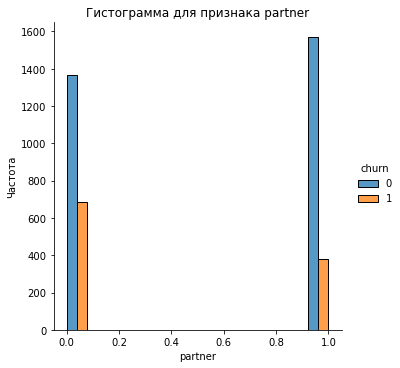

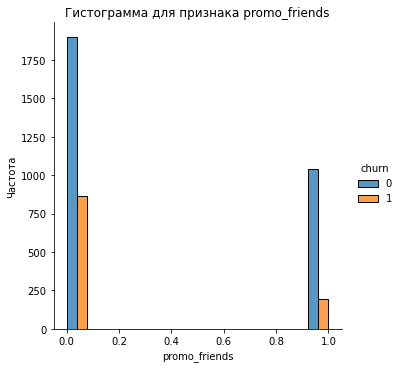

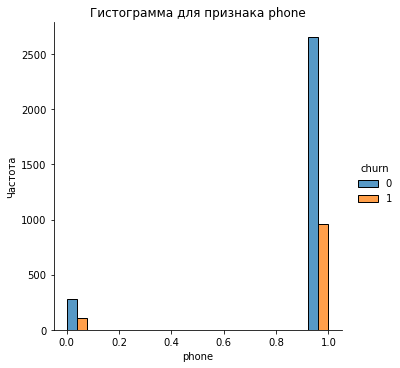

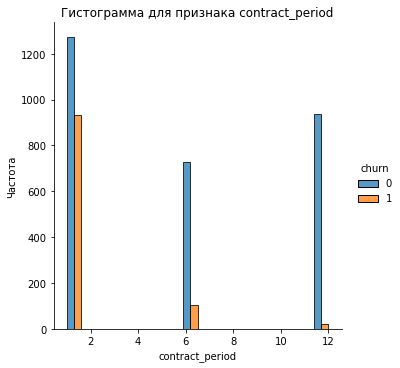

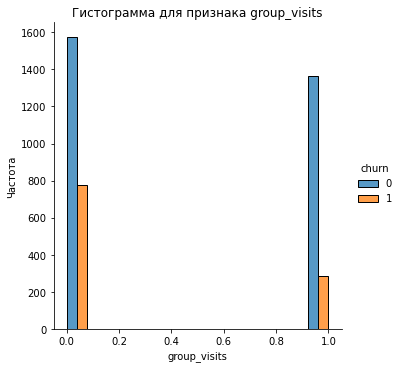

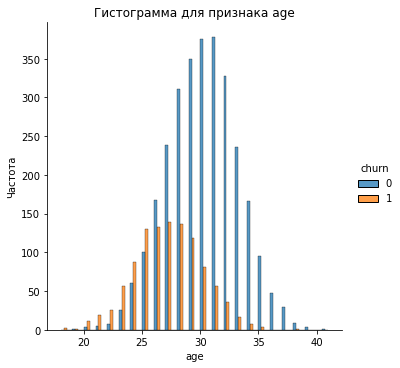

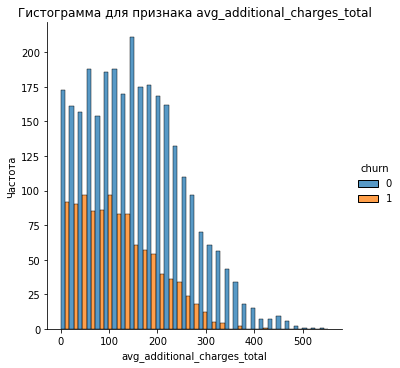

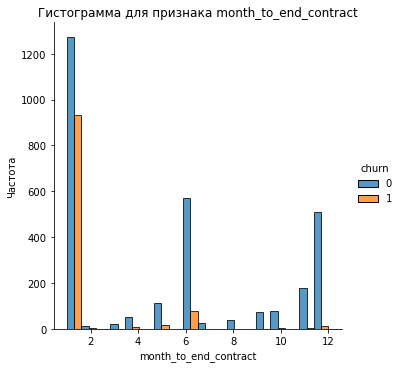

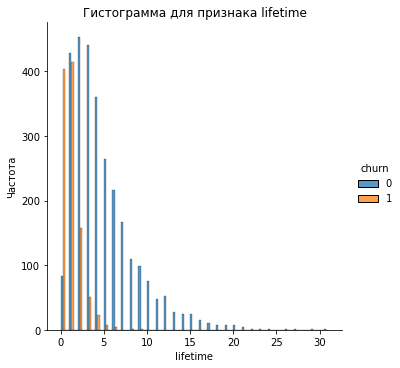

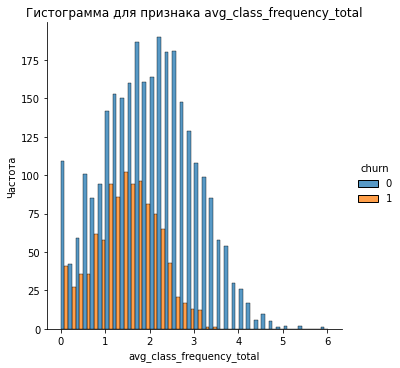

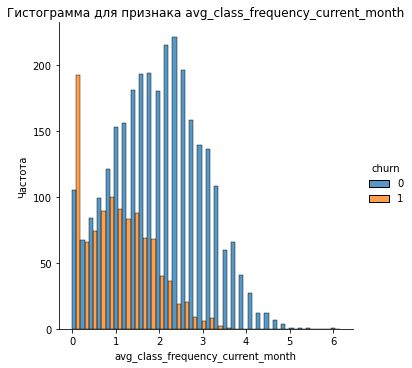

In [10]:
for column in gym.loc[:,'gender':'avg_class_frequency_current_month']:
    sns.displot(gym, x=column, hue="churn", multiple="dodge")
    plt.title('Гистограмма для признака ' + column)
    plt.ylabel('Частота')

1) Признак пола у клиентов оставшихся и ушедших в отток не сильно отличается. В обеих группа количество примерно одинаково: пол 0 - ушедших 519 человек, пол 1 - ушедших 542 человека;\
2) Доля ушедших клиентов из тех, что проживала или работала рядом с фитнес-центром в два раза меньше, чем у тех, кто проживал или роботал в отдаленных от фитнес-центра районах: 31,76% против 65,95% ;\
3) Количество ушедших клиентов, попавших к фитнес-центр не от компании-партнера, почти в два раза больше, чем тех, кто является сотрудником компании-партнера - 684 против 377;\
4) Ушедших клиентов, не воспользовавшися акцией "приведи друга" в 4,5 раза больше, воспользовавшихся данной акцией;\
5) Среди тех, кто покупал абонемент на 1 месяц, ушедших больше: в 9 раз в сравнении с теми, кто приобрел абонемент на 3 месяца, и в 40 раз в сравнении с купившими годовой абонемент;\
6) Клиенты не посещавшие групповые занятия, попали в отток в большем количестве, почти в 3 раза больше таких клиентов, чем тех, кто ходил на групповые занятия;\
7) В разрезе по возрасту наблюдается отток клиентов в возрасте до 31 года, оставшихся клиентов до 31 года меньше. Зато после 31 года клиенты практические не уходят;\
8) Те клиенты, что ушли в отток тратили на дополнительные услуги в два раза меньше лояльных клиентов;\
9) Большая доля клиентов уходила в первый же месяц после первого обращения в фитнес центр: 817 человек в сравнении с 513 оставшимися клиентами. Но на 2-3 месяц доля ушедших оказалась на 20% меньше доли оставшихся клиентов;\
10) Самое большое количество клиентов, попавших в отток, посещали зал в среднем 1,5 раза в неделю за все время с начала действия абонемента;\
11) За последний месяц отток произошел среди клиентов, посещавших в зал в среднем 1 раз в неделю и даже меньше 1 раза.

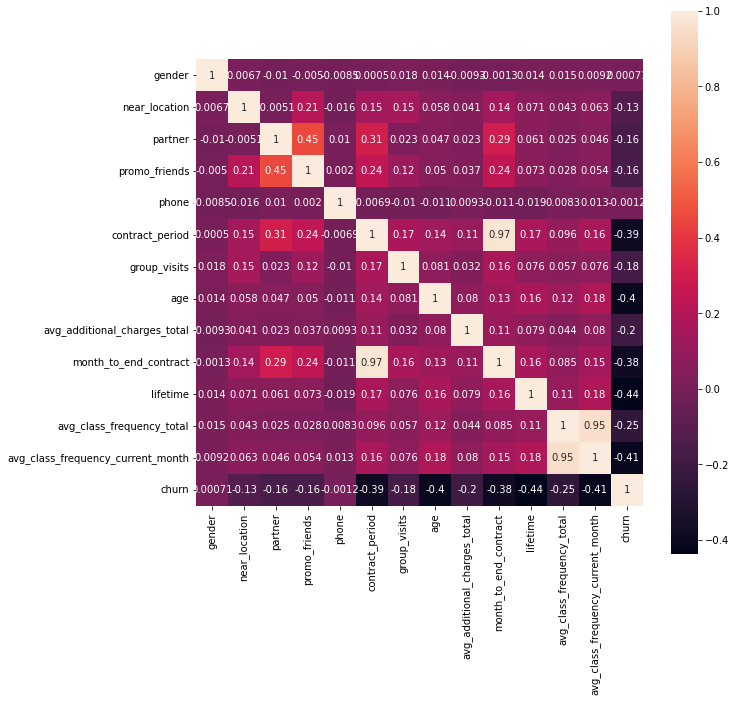

In [11]:
#расчитаем матрицу корреляций признаков и визуализируем ее
cm = gym.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True)
plt.show()

Из сильно коррелирующих между собой признаков можно выделить "Средняя частота посещений в неделю за все время абонемента" и "Средняя частота посещений в неделю за предыдущий месяц", а также "Длительность абонемента" и "Срок до окончания текущего абонемента". \

Также некую степень корреляции можно наблюдать у признаков "Клиент, обратившийся в фитнес-центр в рамках акции "Приведи друга"" и "Сотрудник компании-партнера клуба", и "Сотрудник компании-партнера клуба" и "Длительность абонемента" 

### ***Промежуточный вывод***

После анализа признаков, влияющих на отток клиентов, выявлено, что чаще уходят клиенты в возрасте до 30 лет, также те, что берут абонемент всего на 1 месяц (вероятно пробный), те, кто проживает или работает вдали от фитнес-центра, не попадают в центр по акции "приведи друга" или не работающие в компании-партнера центра.

## 3 Модель для прогнозирования оттока клиентов

Поскольку в датасете присутстуют 2 пары мультиколлинеарных признаков: `avg_class_frequency_total`/ `avg_class_frequency_current_month` и `month_to_end_contract`/`contract_period` - для более точного прогноза моделью попробуем построить модели на исходных данных и на данных без одного признака в каждой паре мультиколлинеарных признаков.

In [12]:
#Напишем функцию, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X, y):
    #разобьем данные на обучающую и валидационнуб выборку
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # стандартизируем данные 
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_st = scaler.transform(X_train)
    X_test_st = scaler.transform(X_test)
    
    #обучим модель и выведем метрики
    model = m
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    print('Метрики для модели:')
    print(' Accuracy:{:.2f}\n Precision:{:.2f}\n Recall:{:.2f}\n F1: {:.2f}'.format(
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test,y_pred))
    )

### 3.1 Обучение модели на алгоритме "Логистическая регрессия"

#### Модель 1

Построим модель на исходных данных:

In [13]:
#разобъем данные на признаки и целевую переменную
X1 = gym.drop('churn', axis = 1)
y1 = gym['churn']

In [14]:
make_prediction(LogisticRegression(random_state=0, solver='liblinear') , X1, y1)

Метрики для модели:
 Accuracy:0.92
 Precision:0.85
 Recall:0.83
 F1: 0.84


Данная модель прогнозирует 92% ответов правильно.

#### Модель 2

Построим модель на данных, из которых уберем по одному из мультиколлинеарных признаков из пар `avg_class_frequency_total`/ `avg_class_frequency_current_month` и `month_to_end_contract`/`contract_period`:

In [15]:
#удаление скоррелированных признаков
gym_1 = gym.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

In [16]:
#разобъем данные на признаки и целевую переменную
X2 = gym_1.drop('churn', axis = 1)
y2 = gym_1['churn']

In [17]:
make_prediction(LogisticRegression(random_state=0, solver='liblinear') , X2, y2)

Метрики для модели:
 Accuracy:0.90
 Precision:0.79
 Recall:0.82
 F1: 0.81


Данная модель прогнозирует 90% ответов правильно.

### 3.2 Обучение модели на алгоритме "Случайный лес"

#### Модель 3

Построим модель на исходных данных:

In [18]:
#разобъем данные на признаки и целевую переменную
X3 = gym.drop('churn', axis = 1)
y3 = gym['churn']

In [19]:
make_prediction(RandomForestClassifier(n_estimators = 100, random_state = 0), X3, y3)

Метрики для модели:
 Accuracy:0.92
 Precision:0.84
 Recall:0.81
 F1: 0.83


Данная модель прогнозирует 92% ответов правильно.

Изменим число деревьев и снова построим модель.

In [20]:
#разобъем данные на признаки и целевую переменную
X3_1 = gym.drop('churn', axis = 1)
y3_1 = gym['churn']

In [21]:
make_prediction(RandomForestClassifier(n_estimators = 30, random_state = 0), X3_1, y3_1)

Метрики для модели:
 Accuracy:0.92
 Precision:0.85
 Recall:0.83
 F1: 0.84


#### Модель 4

Построим модель на данных, из которых уберем по одному из мультиколлинеарных признаков из пар `avg_class_frequency_total`/ `avg_class_frequency_current_month` и `month_to_end_contract`/`contract_period`:

In [22]:
#удаление скоррелированных признаков
gym_1 = gym.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

In [23]:
#разобъем данные на признаки и целевую переменную
X4 = gym_1.drop('churn', axis = 1)
y4 = gym_1['churn']

In [24]:
make_prediction(RandomForestClassifier(n_estimators = 100, random_state = 0), X4, y4)

Метрики для модели:
 Accuracy:0.90
 Precision:0.81
 Recall:0.75
 F1: 0.78


Данная модель прогнозирует 90% ответов правильно.

### ***Промежуточный вывод**

Поскольку в данных нет баланса классов, то оптимальнее было бы ориентироваться на метрику Precision, выявляющую долю правильных ответов среди целевого класса "1". Таким образом модель 1, построенная Логистической регрессией на исходных данных показала себя лучше других моделей. В то же время при подборе параметров алгоритм Случайного леса показывает такие же результаты и имеет место быть. 

## 4 Кластеризация клиентов

Изучим данные и проведем кластеризацию клиентов.

In [25]:
#Удалим из данных столбец с оттоком
x = gym.drop('churn', axis = 1)

In [26]:
#стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(x)

#построим матрицк расстояний
linked = linkage(x_sc, method = 'ward')

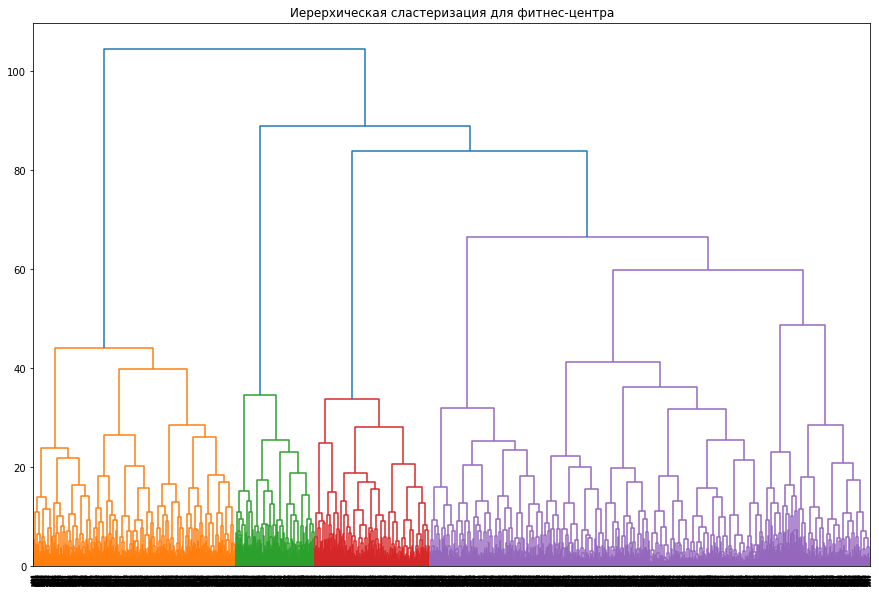

In [27]:
#нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерерхическая сластеризация для фитнес-центра')
plt.show()

Исходя из результатов можно выделить 4 кластера клиентов. Но один из кластеров намного больше других, и для уравновешивания целесообразно выделить 5 кластеров клиентов.

In [28]:
#обучим модель приняв за число кластеров 
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)
# сохраним метки кластера в поле нашего датасета
gym['cluster_km'] = labels
# выведим статистику по средним значениям наших признаков по кластеру и проанализируем долю оттока в каждом кластере
gym.groupby('cluster_km').mean().sort_values(by='churn').T

cluster_km,0,4,1,2,3
gender,0.502970,0.559666,0.522078,0.495050,0.485737
near_location,0.959406,0.976134,0.862338,0.000000,1.000000
partner,0.783168,0.356802,0.470130,0.463366,0.350238
promo_friends,0.574257,0.230310,0.306494,0.079208,0.240095
phone,1.000000,0.998807,0.000000,1.000000,1.000000
contract_period,10.889109,2.669451,4.787013,2.352475,1.948494
group_visits,0.542574,0.473747,0.425974,0.215842,0.341521
age,29.982178,30.125298,29.301299,28.477228,28.167987
avg_additional_charges_total,160.761016,161.657905,143.957664,135.457501,131.622204
month_to_end_contract,9.954455,2.459427,4.475325,2.198020,1.856577


Если проанализировать долю оттока по каждому кластеру, то больше всего уходящих в отток в кластере 3 - 51,4%, на втором месте кластер 2. \
Самые надежные клиенты из кластеров 0 и 4 - 2,7% и 6,8% уходящих в отток.\
В кластер 1 попали "средние" клиенты, доля "оттекающих" - 26,7%

Если сравнивать признаки кластеров, то проживание рядом с фитнес-центром не мешает кластеру 3 прекратить пользоваться услугами фитнес-центра.\
Но тот факт, что клиент является сотрудником компании, хорошо влияет на лояльность клиентов.\
Также в кластере 0 клиенты, пришедшие по акции "приведи друга". \
А еще у лояльных клиентов абонемент на большее количество месяцев и они посещают групповые занятия.\
В кластере 1 в отток попадает каждый 3-й клиент, и судя по высокому показателю в признаках "near_location" и "contract_period" можно предположить, что им важны сами занятия и время, которое они тратят, чтобы добраться до фитнес-центра, а все остальное вторично. И вероятно чаще всего они посещают групповые занятия, и не любят "тягать железо" в зале. \
Кластер 2 отличает от всех, тот факт что они проживают и работают далеко от центра, и именно это вероятно влияет на их отток. Возможно цены на услуги их устраивают, потому как возраст в этой группе молодой и доходы у них еще невысокие, но со временем поездки до фитнес-центра им надоедают и они уходят. А еще вероятно, что на обращение в центр их мотивирует партнерская программа.

Дополнительно визуализируем распредение признаков для кластеров.

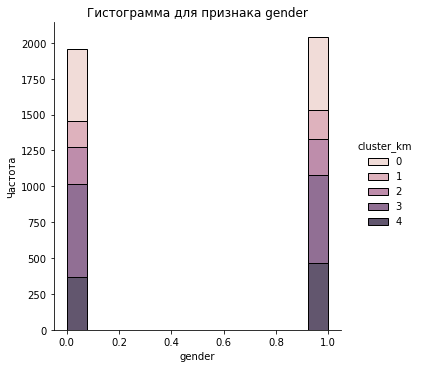

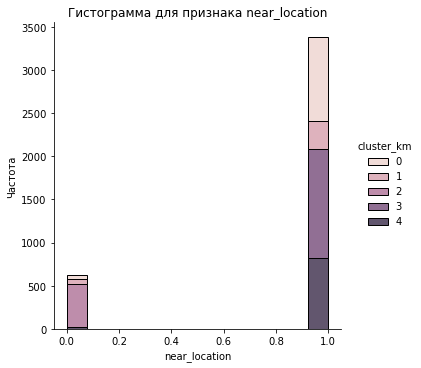

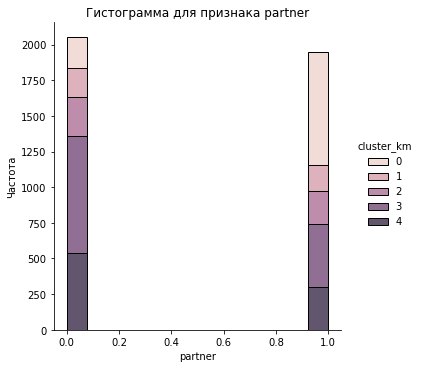

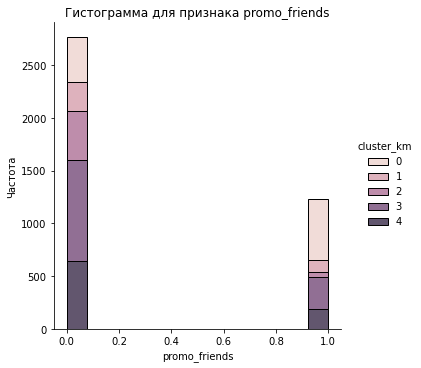

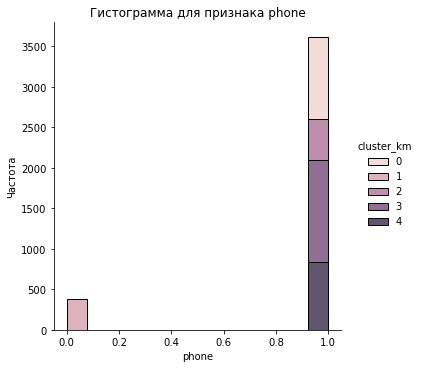

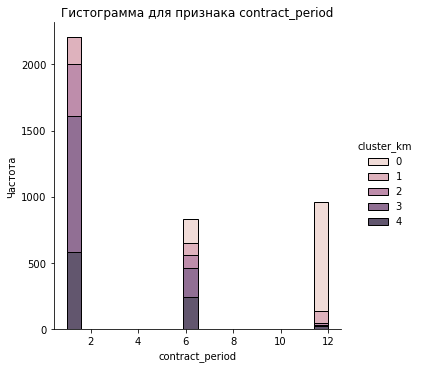

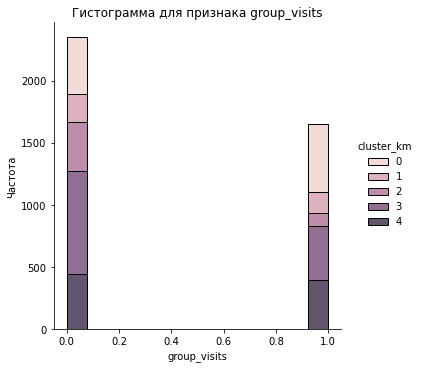

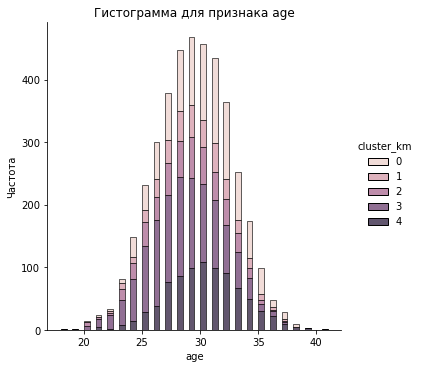

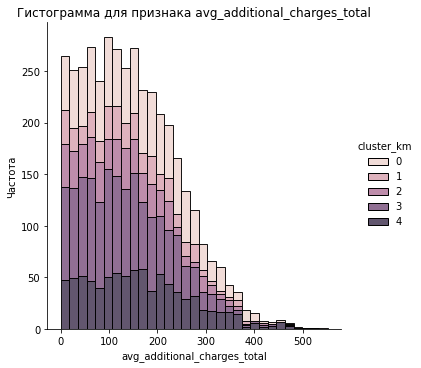

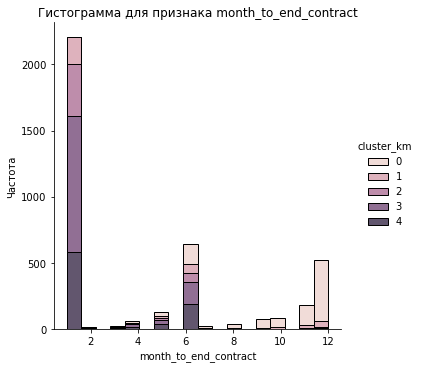

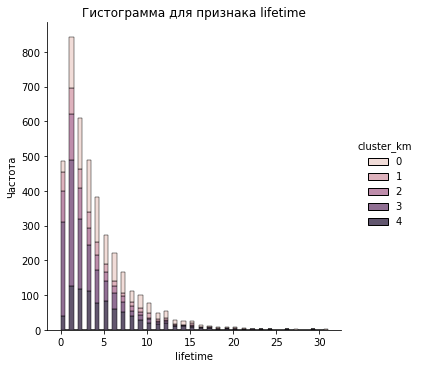

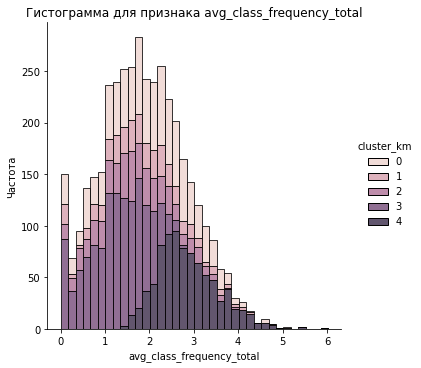

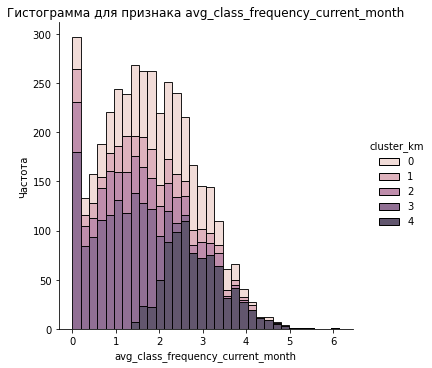

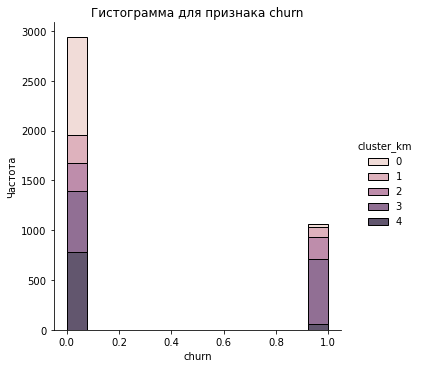

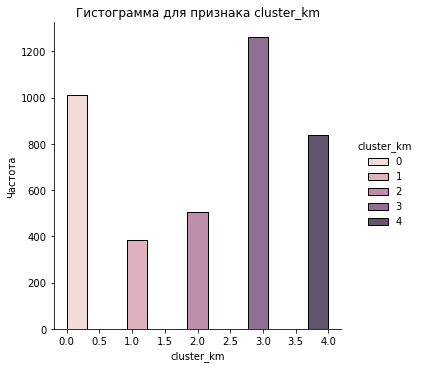

In [29]:
for column in gym:
    sns.displot(gym, x=column, hue="cluster_km", multiple="stack")
    plt.title('Гистограмма для признака ' + column)
    plt.ylabel('Частота')

По распределению в кластерах можно сделать следующие выводы:
1) Самая многочисленная группа в кластере 3, как раз той, где отток выше всего. Но распределие по полу в каждом кластере примерно одинаковое, отличается лишь немного кластер 4, там больше клиентов с признаком "1", и исходя из предыддущих данных в этом кластера отток тоже небольшой, а значит возможно пол "1" влияет на устойчивость к оттоку;\
2) В самом "оттекающем" кластере 3 клиенты проживают или работают недалеко от фитнес-центра.А значит самые лояльные клиенты готовы тратить время на дорогу. Больше всего живущих далеко от фитнес-центра из кластера 2.\
3) Как было выявленно ранее самые лояльные клиенты являются сотрудниками компаний-партнеров центра. Но в то же время, второй по лояльности кластер таких клиентов имеет в меньшей степени. "Середнечки" из кластеров 1 и 2 по большей части не используют партнерскую программу.\
4) Такой же вывод можно сделать и для признака "promo_friends".\
5) Клиенты ушедшие в отток имеют абонемент на 1 или 6 месяцев, но взявших абонемент на 1 месяц почти в 5 раз больше тех, кто взял на 6 месяцев. Примерно такая же ситуация с клиентам из кластера 2. Самые лояльные клиенты берут абонемент на 12 месяцев, но есть и те, кто берет на 6. Второй по лояльности кластер все же предпочитает абонементы на 1 месяц, и в два раза меньше клиентов предпочитающих абонемент на 6 месяцев.\
6) Абсолютно точно клиенты из лояльных кластеров 0 и 4 ходят на групповые занятия, а те кто попадает в отток посещают такие занятия в меньшей степени.\
7) А вот по распределению признака "age" можно сказать, что лояльность "наступает" у клиентов после 30 лет, а более молодые клиенты как раз попадают в группу "оттока".\
8) С признаком "avg_additional_charges_total" все логично, клиенты из кластера 0 тратят большие суммы, а вот из кластера 3 оставляют в центре меньше денег.\
9) Те кто попал в кластер 0 и 4 раньше всех других из других кластеров обратились в центр.\
10) У кластеров 0 и 4 по признаку "avg_class_frequency_total" и "avg_class_frequency_current_month" смещение идет в большую строну, то есть они посещают центр чаще. А вот ушедшие в отток занимались реже 2 раз в неделю.\

### ***Промежуточный вывод***

Выделены 5 кластеров клиентов и определены признаки влияющие на отток или удержание клиентов, такие как партнерские программы и акции, посещение групповых занятий, длительность абонемента и возраст.

## 5 Общий вывод

По результату анализа выявлен самый лояльный клиент:
- Чаще всего он работает или проживает недалеко от фитнес-центра, он пользуется партнерскими и акционными программами, ему больше 29 лет, и покупает абонемент на полгода или год.

В отток попадают 2 типа клиета:
- Живущий и работающий недалеко от фитнес-центра, редко пришедший по партнерской или акционной программе, практически не посещающий групповые занятия, ему меньше 29 лет, и он приобрел абонемент на 1 месяц.
- Живущий и работающий далеко от фитнес-цетнра, но в половине случаев пришедший по партнерской программе, также практически не посещающий групповые занятия, ему меньше 29 лет, и он приобрел абонемент на 1 месяц.

Некий переломный возраст, когда клиент попадает в "лояльный" кластер - 30 лет, вероятно стоит больше направлять маркетинговые дейтствия на эту группу людей. А также возможно стоит расширить список компаний-партнеров, поскольку пришедшие по этой программе клиенты дольше остаются с фитнес-центром, а срок жизни влияет на доход от клиента в разрезе продажи дополнительных услуг. Очень хорошо показывают себя групповые занятия и кластерах с лояльными клиентами, возможно стоит усилить продажи именно этого сегмента.

В качестве алгоритма прогнозирующего отток клиентов можно применить логистическую регресиию. Она довольно точно предскажет вероятный отток клиента, но если применить Случайный лес с хорошо подобранными параметрами, можно применить и этот алгоритм.